In [2]:
# Description: This program predicts if a passenger will survive on the Titanic

# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load the datasets 
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
#Print the first 10 rows 
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Count the number of rows and columns in the dataset
train_df.shape

(891, 12)

In [7]:
# Get some statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Get a count of the # of survivors
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, '# of Survivors')

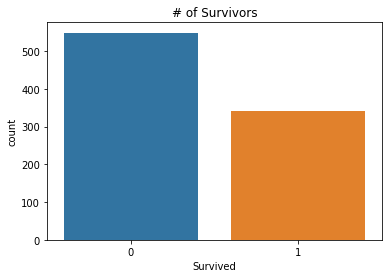

In [9]:
# Visualize the # of survivors
sns.countplot(train_df['Survived']).set_title('# of Survivors')

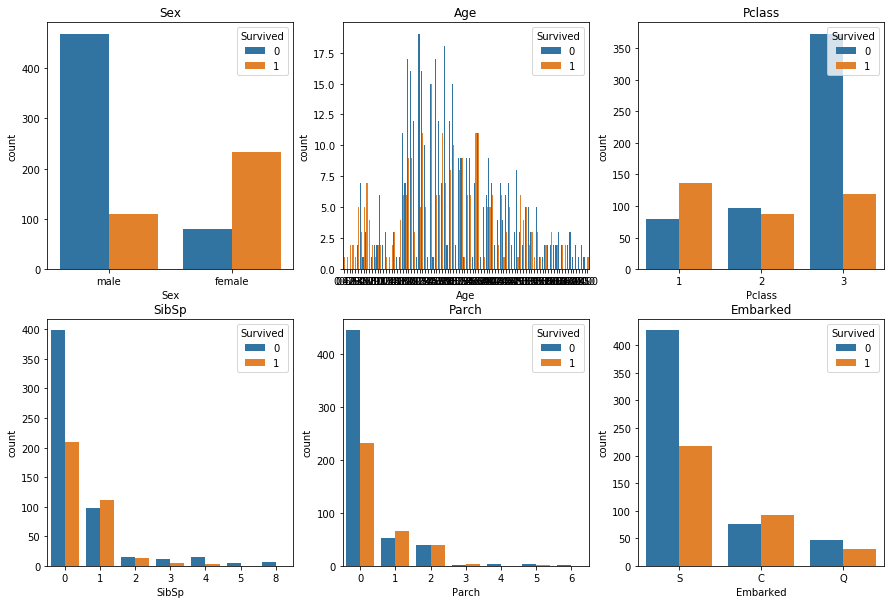

In [10]:
# Visualize the count of survivors for columns 'sex', 'age', 'pclass', 'sibsp', 'parch', 'embarked'
cols = ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = 2
n_cols = 3

# Establish Subplot Grid and Fig Size for each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows * 5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index to go through the number of columns
        ax = axs[r][c] # show where to position each subplot
        sns.countplot(train_df[cols[i]], hue=train_df['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived', loc = 'upper right')

In [11]:
# Look at the survival rate by sex
train_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
# Look at the survival rate by sex and class
train_df.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


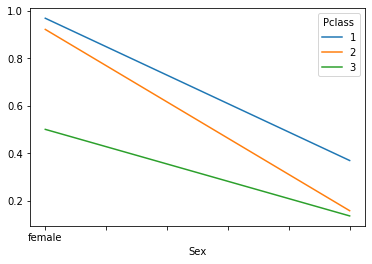

In [13]:
# Look at the survival rate by sex and class visually 
train_df.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

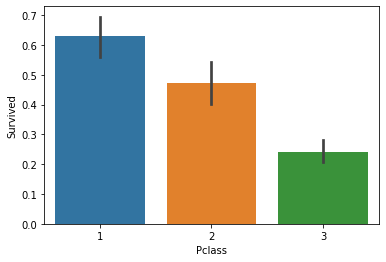

In [14]:
# Plot the survival rate of each class
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)

In [15]:
# Look at the survival rate by sex, age, and class (Break up age by kids and adults)
Age = pd.cut(train_df['Age'], [0,18,80]) 
train_df.pivot_table('Survived', ['Sex', Age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

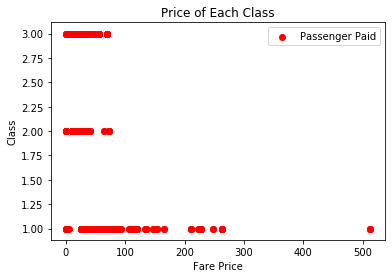

In [16]:
# Plot the prices paid of each class
plt.scatter(train_df['Fare'], train_df['Pclass'], color = 'red', label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Fare Price')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [17]:
# Count the empty values in the columns
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

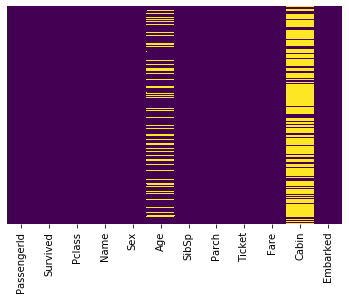

In [18]:
# Plot a heatmap of null values 
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
#Count the empty (NaN, NAN, na) values in each column 
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# Drop the columns
train_df = train_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [21]:
#Remove the rows with missing values
train_df = train_df.dropna(subset =['Age', 'Embarked'])

In [22]:
#Count the NEW number of rows and columns in the data set
train_df.shape, test_df.shape, test_df.shape

((712, 9), (418, 8), (418, 8))

In [23]:
# Look at the data types 
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [24]:
#Print the unique values in the columns
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [25]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
train_df.iloc[:,3]= labelencoder.fit_transform(train_df.iloc[:,3].values)
#print(labelencoder.fit_transform(titanic.iloc[:,3].values))

#Encode embarked
train_df.iloc[:,8]= labelencoder.fit_transform(train_df.iloc[:,8].values)
#print(labelencoder.fit_transform(titanic.iloc[:,8].values))

#Print the NEW unique values in the columns
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

[1 0]
[2 0 1]


/Users/kohata/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
# Split the data into independent 'X' and dependent 'Y' variables
X = train_df.iloc[:, 2:9].values 
Y = train_df.iloc[:, 1].values

In [31]:
# Split the dataset in 80% training and 20% testing 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, Y_train.shape, X_test.shape

((569, 7), (569,), (143, 7))

In [32]:
#Scale the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
# Create a funcation with different machine learning models
def models(X_train, Y_train):
    
    # Use Logistic Regression (binary regression)
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    # Use KNeighbors (SVM used for classification based on k neighbors)
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    # Use SVC (Linear Kernerl) (SVM supervised model for classification)
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    # Use SVC (RBF Kernerl) (SVM supervised model for classification)
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    # Use Gaussian NB (Naive Bayes predicts the probability of different class based on various attr)
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # Use Decision Tree (SVM to classify, continuously split to a certain parameter)
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    # Use RandomForestClassifier (SVM building an ensemble of decision tress trained with bagging)
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [34]:
# Get and train all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


In [35]:
# Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = cm.ravel()
    
    test_score = (TP + TN) / (TP + FP + FN + TN)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()
    

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [36]:
#Get the importance of the features
forest = model[6]
importances = pd.DataFrame({'feature':train_df.iloc[:, 2:9].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


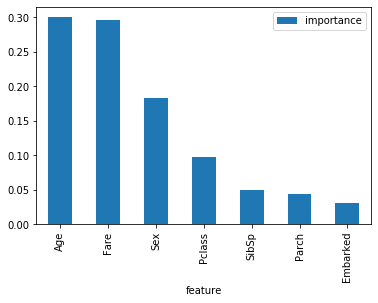

In [37]:
#Visualize the importance
importances.plot.bar()

In [38]:
# Print the prediction of the random forest classifier 
pred = forest.predict(X_test)
print(pred)
print()

#Print the actual values 
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [39]:
# Testing my survival rate 

#Survived      int64
#Pclass        int64
#Sex           int64
#Age         float64
#SibSp         int64
#Parch         int64
#Fare        float64
#Embarked      int64

# My survival attrs
my_survival = [[3,1,23,1, 0, 200, 0]]

# Scale my survival
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# Print prediciton of my surivival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
    print('Unfortunately, you did not survive!')
else: 
    print('Congrats, you survived!')

[0]
Unfortunately, you did not survive!
